

# Data Wrangling Summary  

_We Rate Dogs dataset Wrangling code...By Randy Jackson_

## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.  

The datasets we wrangling are a tweet archive of Twitter user @dog_rates, also known as WeRateDogs. This data is supplemented with additional data via the Twitter API and and image predictions file which is the output of running the images in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs.

In this paper we will provide documentation for data wrangling steps: gather, assess, and clean

## Gathering
Gathering Data for this Project composed from three pieces of data as described below:

**Enhanced Twitter Archive**

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, filtered for tweets with ratings only (there are 2356).  This file `twitter_archive_enhanced.csv`was dowloaded manually via a provided link. 

**Additional Data via the Twitter API*

`retweet` count and `favorite count` are two of the notable column omissions to the archive. The code uses Twitter's API to gather this valuable data. This information was queried using the tweet IDs in the WeRateDogs Twitter archive.  The JSON data for each tweet was queried using Python's Tweepy library and storeed in a file called `tweet_json.txt` file.

**Image Predictions File**

This file (image_predictions.tsv) is hosted on Udacity's servers and was downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

### Gather: Summary

Gathering was the first step in the data wrangling process. Data aquisition was straightforward, the JSON code was adapted from the following Stack Overflow __[Stack Overflow](http://bit.ly/2GgLi2j)__ article.  I modified the code to handle the Twitter rate limits and to capture errors associated with tweet data that could not be retrieved. 

```python

        except tweepy.TweepError as te:
            if te.api_code==88: #rate limit exceeded error code
                time.sleep(60 * 15)
                continue
            else:
                print("Failed to get Tweet ID:{0}, Reason:{1}".format(tweet_id, te.reason))
                continue
```
**Output from API Tweet data retrieval code:**

Failed to get Tweet ID:888202515573088257, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:873697596434513921, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:869988702071779329, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:866816280283807744, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:861769973181624320, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:842892208864923648, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:837012587749474308, Reason:[{'code': 34, 'message': 'Sorry, that page does not exist.'}]<br>
Failed to get Tweet ID:827228250799742977, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:802247111496568832, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Failed to get Tweet ID:775096608509886464, Reason:[{'code': 144, 'message': 'No status found with that ID.'}]<br>
Rate limit reached. Sleeping for: 653<br>
Rate limit reached. Sleeping for: 678<br>



## Assessing

I spent a great deal of time performing visual assessment. In order to address the limitations of scrolling in Jupyter note books I loaded the data into Microsoft Access so that I could easily scroll in eaither directions and expand columns and rows to better view the data, below is screenshot taken during the visual assessment phase. My observances as noted below the image.

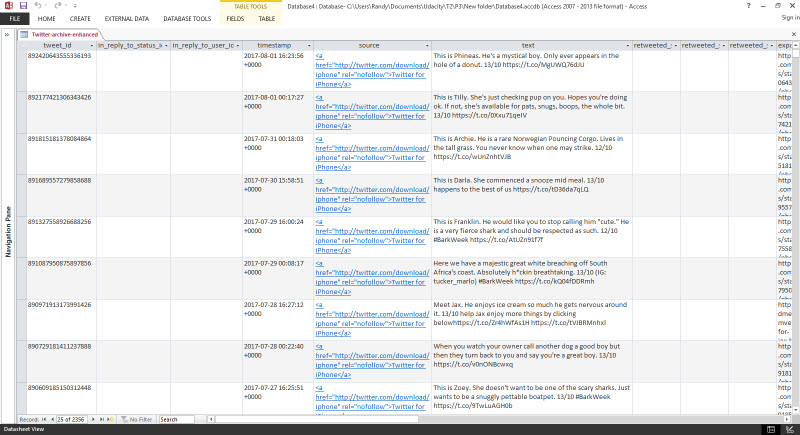

In [3]:
from IPython.core.display import Image 
Image(filename='visual_assess_1.jpg')


Below are my observances, some were noted during the visual assessment I did offline using Mircosoft Access and others were noted during the programmatic assessment phase. After gathering the observances reordered them by decreasing levels of severity and attempted to address them in the following in the order: quality issues related to completness, followed by tidiness, and then the remaining quality issues.

#### Completeness<br>
Quality - Missing 281 records from Predictive Image file (2356 in Twitter Archive minus 2075 in the Predictive Image file).<br>
Quality - Missing 10 records from Tweets data due to errors.<br>

#### Tidiness<br>
Tidiness - Dog rating are stored in four columns (doggo, floofer, pupper, and puppo).<br>
Tidiness - Mulitple prediction columns and the inclusion non-dog information may have limited value.<br>
Tidiness - Multiple types of observational units are stored in the same table, Twitter data and Dog data are comingled<br>

#### Quality<br>
Quality - Data contains retweets<br>
Quality - Data contains values unrelated to tweets or dogs<br>
Quality - Some dogs hove no pictures<br>
Quality - Some dogs have bad dog names<br>
Quality - `source` column has no value, and multiple values in one column<br>
Quality - `expanded_urls` has no value, and multiple values in one column<br>
Quality - `img_num` has no value<br>
Quality - `timestamp` has the wrong data type<br>
Quality - Data types for `in_reply_to_status_id` and `in_reply_to_user_id` could be changed to match Twitter API<br>
Quality - `in_reply_to_status_id` and `in_reply_to_user_id` are sparsely populated<br>
Quality - Dog breed names are seperated by an underscore and have inconsistent case<br>

## Cleaning
Cleaning the data was the third step in data wrangling. Details are contained in the "Define" portion of the Define-Code-Test steps in the wrangling code file.  Here, I will just focus on the highlevel approches related to a fe of the most significant concerns.

My first step was to address missing records.  Unfortunately, there wasn't anything that could be done about the missing 281 records from Predictive Image file (2356 in Twitter Archive minus 2075 in the Predictive Image file). We don't have access to the prediction model to try to obtain predictions for the remaining rows. However, roughly 100 of these rows were associated with retweets and a number of them were aligned with images that are not dogs and were subsequently removed which reduced the discrepancy. 


Next I addressed the 10 missing records from Tweets data due to errors, my approach was to impute the counts with the mean.  However this cleaning step turned out to be uncessary.  Later analysis determined that the 10 records in error were either related dogs with no images or re-tweets, and each of which was subsequently removed.  However, I left the code in to illustrate an example of the process of imputing missing data.

Two key tidiness issues were that dog stages were stored in four columns (doggo, floofer, pupper, and puppo) and that there were mulitple prediction columns in the image prediction file.  The image prediction file also included low confidence level values associated with images determined not to be of dogs and therfore of no value.  My approach to correcting the image prdiction data was to create and excute a function applied to the dataframe to inspect each probablity related column and store the first true value and highest convidence level. To merge the 4 dog stages, I used melt collapse the columns.  One concern was that there were 12 instances where multiple dog stages were associated with a single tweet.  I decided to keep both records, which would lead to a one-to-many relationships when this data was joined but it reflects the reality of pictures that contain two dogs, two stages, and two ratings.

Some of the dog names were bad, and they all appeared to be lower case words.  The dog names in the text are usually accompanied by several intoductory phrases.  I created a function to loop through the names looking for these phrases and assume that the next word is the dog's name and replace the name. I limited the change only to lower case names in order to reduce the potential of altering good names.

I am of the opnion that the data contains TWO OBSERVATIONAL UNITS and that multiple types of observational units are stored in the same table.  My opinion was that Twitter data and Dog data are comingled and should be seperated into their own files.  I decided to merge and reconfigure the data into two files to support two observational units, one file for tweet observations and another for dog observations.  The rationale will be further elaborated on in the report document that accompanies this workbook.  I took the following approach: (1) First, I merged the data retrieved from the Tweepy API into the Twitter archive data to get the favorites and retweet counts into the archive data set. Thes new data set serveed as the foundation of our tweet observations. (2) Next, I merged the dog stage date which I melted seperately from the 4 stage columns in the twitter archive into the image prediction data to get the dog_stage combined with the image data dataframe. (3) I then performed a merge of the two data sets using an INNER join and then dropped all but our dog observations, to effectively "move" our dog `name` column to our dog observation table.

# Conclusion

This exercise underscored the importance of Data wrangling as a required core skill. It also underscored the challenges of having clear motivation or foresightedness, because I quickly realized that the final look of the data must depend on what you plan to do with it. I think its also fair to say that data wrangling also requires a greater range of technical/programming skills.  There were opportunities to use Pandas and its vectorized functions, but there were also some efforts that required more iterative programming, the use of regular expectssion, etc.  I also saw opprtunites that would have been more easily addressed in SQL.  I also discovered that fixing an issue is not always an isolated event. Sometimes earlier wrangling steps are found to be unncessary as a result of some subsequent steps (i.e., missing values/rows that you sought to address a negated by the fact that the rows are dropped by the requirement of some later step). Given the nature of the rating system used by We Rate Dogs it makes it difficult to put too much credability in the rating based statistcs. This exercise underscores the need for upstream data quality controls in order to have confidence in the analysis results. Extracting data from free form text based input into systems with no input validation is a difficult and error prone task.